# Titanic EDA

![alt](https://ipla.pluscdn.pl/dituel/cp/ow/owwqyppqja265g74vrfpzrff5cg5yeux.jpg)

## Import bibliotek

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt

## Import danych i podstawowe informacje

In [3]:
df = pd.read_csv("data/titanic.csv", sep= ";")

In [4]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0.0,0,24160,2.113.375,B5,S,2,NaN,USA
1,1,1,"Allison, Master. Hudson Trevor",male,"0,92",1.0,2,113781,151.55,C22 C26,S,11,NaN,CANADA
2,1,0,"Allison, Miss. Helen Loraine",female,2,1.0,2,113781,151.55,C22 C26,S,NaN,NaN,CANADA
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2,113781,151.55,C22 C26,S,NaN,135.0,CANADA
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2,113781,151.55,C22 C26,S,NaN,NaN,CANADA
5,1,1,"Anderson, Mr. Harry",male,48,0.0,0,19952,26.55,E12,S,3,NaN,USA
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1.0,0,13502,779.583,D7,S,10,NaN,USA
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0.0,0,112050,0,A36,S,NaN,NaN,IRELAND
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2.0,0,11769,514.792,C101,S,D,NaN,USA
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0.0,0,PC 17609,495.042,NaN,C,NaN,22.0,URUGUAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1300 non-null   object 
 5   sibsp      1308 non-null   float64
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  1303 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 143.3+ KB


In [6]:
df.describe(include= 'object')

,name,sex,age,ticket,fare,cabin,embarked,boat,home.dest
count,1309,1309,1300,1309,1308,295,1307,486,1303
unique,1307,2,147,929,280,186,3,27,48
top,"Kelly, Mr. James",male,"22,0",CA. 2343,8.05,C23 C25 C27,S,13,UK
freq,2,843,35,11,60,6,914,39,323


In [7]:
df.describe(include = 'number')

,pclass,survived,sibsp,parch,body
count,1309.000000,1309.000000,1308.000000,1309.000000,121.000000
mean,2.294882,0.381971,0.499235,0.385027,160.809917
std,0.837836,0.486055,1.041965,0.865560,97.696922
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,72.000000
50%,3.000000,0.000000,0.000000,0.000000,155.000000
75%,3.000000,1.000000,1.000000,0.000000,256.000000
max,3.000000,1.000000,8.000000,9.000000,328.000000


## Zmiana typów danych

In [8]:
df['fare']= df['fare'].apply(lambda x: x.replace('.', '', 1) if str(x).count('.')>1 else x).astype(float).apply(round, args = (2,)) 

In [9]:
df['age']= df['age'].apply(lambda x: x.replace(',', '.', 1) if str(x).count(',')==1 else x).astype(float).apply(round, args = (2,)) 

## ilu przeżyło

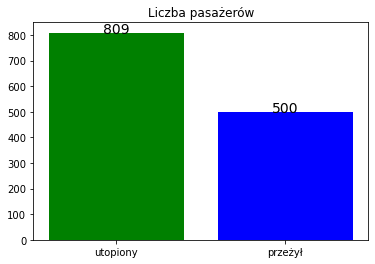

In [10]:
fig, ax = plt.subplots()
x = df['survived'].value_counts().sort_index()
plt.bar(x = x.index, height = x.values, color = ['green', 'blue'])
plt.xticks(np.arange(2), ['utopiony', 'przeżył'])
plt.title('Liczba pasażerów')
y=x.values

x1= df['survived'].value_counts(normalize = False).sort_index()
y=x1.values
x= x1.index
for index in range(len(x1)):
    ax.text(x[index], y[index], y[index], size=14, color ='k', ha = 'center')
    

    
 

## Analiza rozkładów

- liczba pasażerów według płci


In [11]:
df.groupby(['sex', 'survived'], as_index=False).agg('count')[['sex', 'survived']]

,sex,survived
0,female,0
1,female,1
2,male,0
3,male,1


- liczba pasażerów według portu

In [12]:
df.groupby(['home.dest', 'survived']).agg('count')['name']

home.dest  survived
ARGENTINA  0             5
AUSTRALIA  0             1
           1             1
AUSTRIA    0             7
           1             1
                      ... 
UK         1           108
URUGUAY    0             3
USA        0           142
           1           177
WALES      0             7
Name: name, Length: 75, dtype: int64

- liczba pasażerów według klasy biletu

In [13]:
df.groupby(['pclass', 'survived']).agg('count')['name']

pclass  survived
1       0           123
        1           200
2       0           158
        1           119
3       0           528
        1           181
Name: name, dtype: int64

- liczba pasarzerów według płci

In [14]:
df.groupby(['sex', 'survived']).agg('count')['name']

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: name, dtype: int64

In [15]:
numericcols = [col for col in df.columns if df[col].dtype in [ float, int] ]

In [16]:
numericcols

['age', 'sibsp', 'fare', 'body']

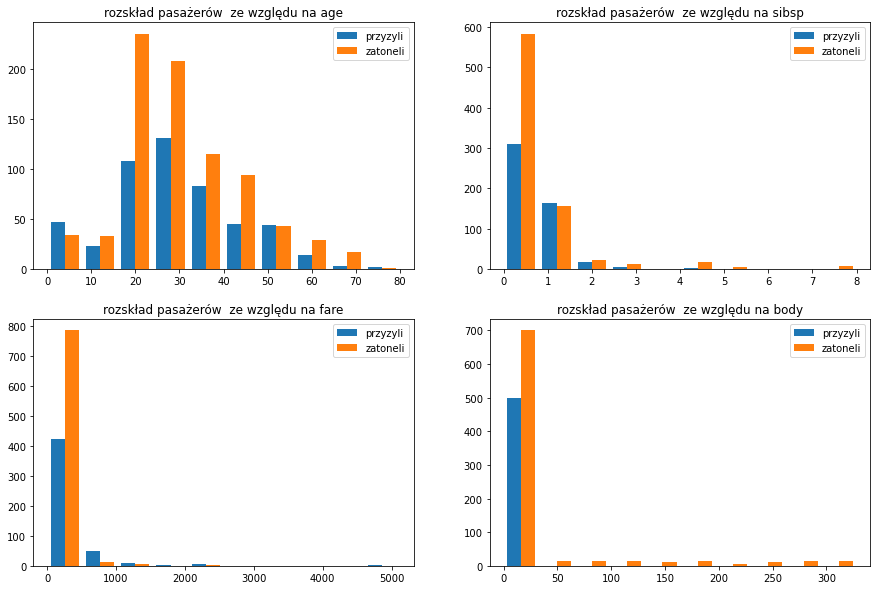

In [17]:
#plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize = (15,10), nrows = 2, ncols=2)
counter =0
row=0
col=0
for i in ax:
    for j in i:
        df[numericcols[counter]].fillna(0, inplace=True)
        
        if numericcols[counter] != 'survived':
            x=df[numericcols[counter]][df['survived']==1].values
            x1=df[numericcols[counter]][df['survived']==0].values
            #j.hist(x, color = 'red', edgecolor = 'red', alpha = 0.5)
            #j.hist(x1, color = 'green', alpha = 0.5, edgecolor = 'green')
            j.set_title(f'rozskład pasażerów  ze względu na {numericcols[counter]}')
            j.hist([x, x1], label=['przyzyli', 'zatoneli'])
            j.legend()
            counter += 1
            

## Wiek 

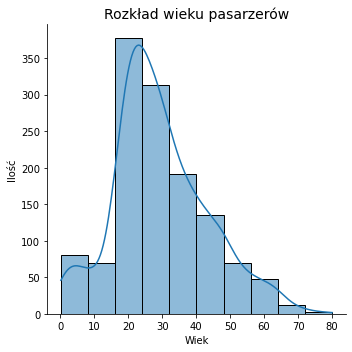

In [18]:
sns.displot(data = df, x = df[(df["age"] > 0)].age, kde=True, bins = 10)

# set titles and labels
plt.title('Rozkład wieku pasarzerów',fontsize= 14)
plt.xlabel('Wiek')
plt.ylabel('Ilość')
#ax1.set_ylabel('Częstość')

#ax2 = ax1.twinx()
#ax2.set_ylabel('Ilość')
# clean layout
plt.tight_layout()

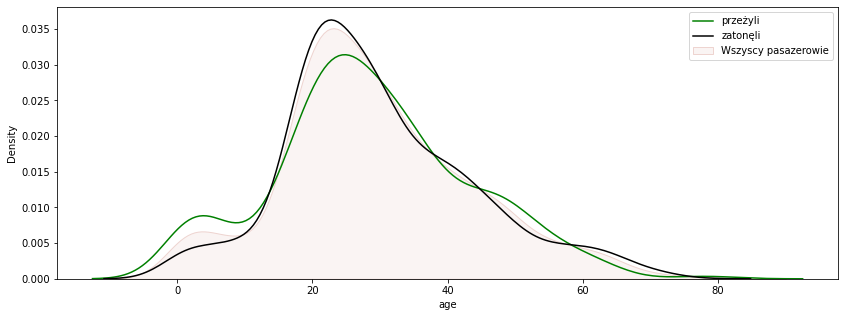

In [19]:
plt.figure(figsize = (14,5))
sns.kdeplot(x= 'age',  color='#eed4d0', shade=True, data= df, label = 'Wszyscy pasazerowie')
sns.kdeplot('age', color = 'green', data=df[df['survived']==1], label = 'przeżyli')
sns.kdeplot('age', color = 'black', data = df[df['survived']==0], label ='zatonęli')
plt.legend()

In [20]:
df.groupby(['survived', 'pclass', 'sex'])['age'].describe()

count       mean        std    min     25%   50%  \
survived pclass sex                                                        
0        1      female    5.0  35.200000  23.445682   2.00  25.000  36.0   
                male    118.0  42.504237  14.697447   0.00  31.375  43.5   
         2      female   12.0  33.916667  13.412737  18.00  25.500  29.5   
                male    146.0  32.571918  12.248292   0.00  24.000  30.0   
         3      female  110.0  24.240909  13.390352   1.00  17.250  21.5   
                male    418.0  26.398158  11.477911   0.00  20.000  24.0   
1        1      female  139.0  37.136691  13.936295   0.00  25.000  36.0   
                male     61.0  35.736393  14.997426   0.00  27.000  36.0   
         2      female   94.0  26.961915  12.648805   0.92  20.000  28.0   
                male     25.0  18.053200  16.143724   0.67   2.000  20.0   
         3      female  106.0  21.836509  10.855694   0.17  17.000  22.0   
                male     75.0  23.089733  10.407582   0.83  19.500  24.0   

                         75%   max  
survived pclass sex                 
0        1      female  50.0  63.0  
                male    53.5  71.0  
         2      female  39.5  60.0  
                male    39.0  70.0  
         3      female  32.0  64.0  
                male    32.0  74.0  
1        1      female  48.0  76.0  
                male    47.0  80.0  
         2      female  34.0  55.0  
                male    29.0  62.0  
         3      female  27.0  64.0  
                male    29.5  45.0

<AxesSubplot:title={'center':'Wykres pudełkowy wieku pasażera i umieralności'}, xlabel='age', ylabel='survived'>

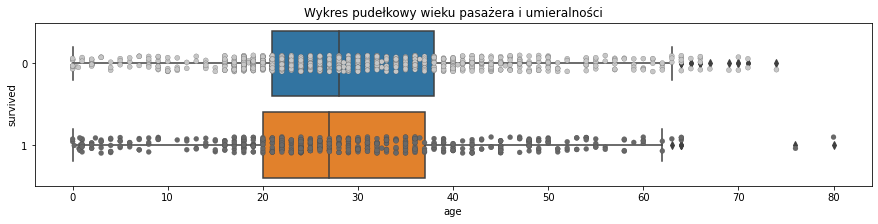

In [21]:
plt.figure(figsize =(15,3))
sns.boxplot(y='survived', x='age', data=df, orient = 'h')
plt.yticks(np.arange(2), ['zatopiony', 'przezyl'])
plt.ylabel('Status pasażera')
plt.title('Wykres pudełkowy wieku pasażera i umieralności')
sns.stripplot(y='survived', x ='age', data =df, orient = 'h', palette  = 'Greys', linewidth = 0.2, s=5.0)

## Klasa biletu

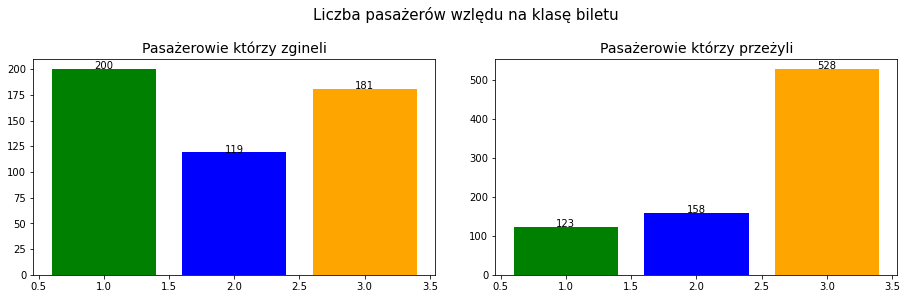

In [22]:
fig, ax = plt.subplots(figsize = (15,4), nrows=1, ncols =2)
x1=df[df['survived'] ==1]['pclass'].value_counts(normalize = False).sort_index()
ax[0].bar(x = x1.index, height = x1.values, color = ['green', 'blue', 'orange'])
ax[0].set_title('Pasażerowie którzy zgineli',  fontsize =14)
y=x1.values
x= x1.index
fig.suptitle('Liczba pasażerów wzlędu na klasę biletu', ha = 'center', fontsize = 15)
#labels = (all_data['Survived'].value_counts())
# add result numbers on barchart
labels = x1.values
for index in range(len(x1)):
    ax[0].text(x[index], y[index], y[index], size=10, ha = 'center' )

x1=df[df['survived'] ==0]['pclass'].value_counts(normalize = False).sort_index()

ax[1].bar(x = x1.index, height = x1.values, color = ['green', 'blue', 'orange'])
ax[1].set_title('Pasażerowie którzy przeżyli', fontsize =14)
y=x1.values
x= x1.index
labels = x1.values
for index in range(len(x1)):
    ax[1].text(x[index], y[index], y[index], size=10, ha = 'center' )
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.8, wspace=0.15, hspace=0.5)

Text(0.5, 1.0, 'Wskaźnik przeżycia ze względu na klasę biletu')

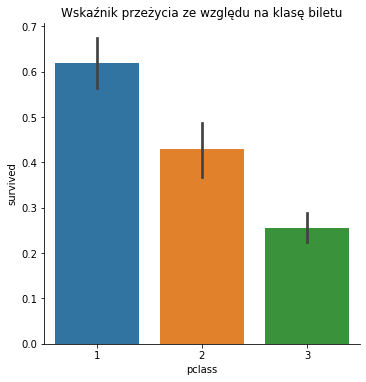

In [23]:
sns.catplot(x='pclass',y='survived', kind ='bar', data=df); 
plt.title('Wskaźnik przeżycia ze względu na klasę biletu')

In [24]:
df['survived'][df['pclass']==1].value_counts(normalize =True)

1    0.619195
0    0.380805
Name: survived, dtype: float64

C:\Users\48603\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wskaznik przezycia ze względu na płec i klasę biletu')

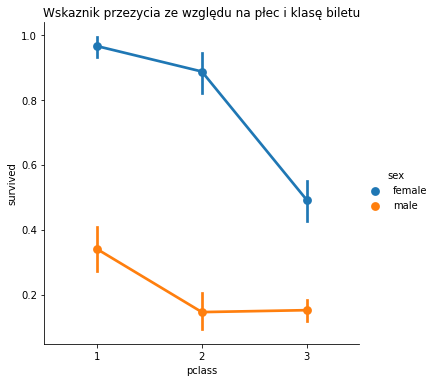

In [25]:
sns.catplot('pclass','survived',hue='sex', kind='point', data=df);
plt.title('Wskaznik przezycia ze względu na płec i klasę biletu')


In [26]:
pd.crosstab([df.sex, df.pclass],[df.survived] ,margins=True, normalize =True)

survived              0         1       All
sex    pclass                              
female 1       0.003820  0.106188  0.110008
       2       0.009167  0.071811  0.080978
       3       0.084034  0.080978  0.165011
male   1       0.090145  0.046600  0.136746
       2       0.111536  0.019099  0.130634
       3       0.319328  0.057296  0.376623
All            0.618029  0.381971  1.000000

## Port

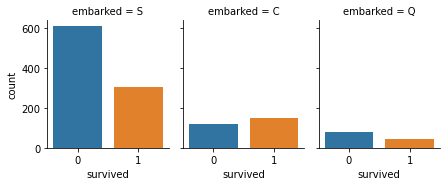

In [30]:

g = sns.catplot(x="survived", col="embarked", col_wrap=4,
                data=df[df.embarked.notnull()],
                kind="count", height=2.5, aspect=.8)

<AxesSubplot:xlabel='embarked'>

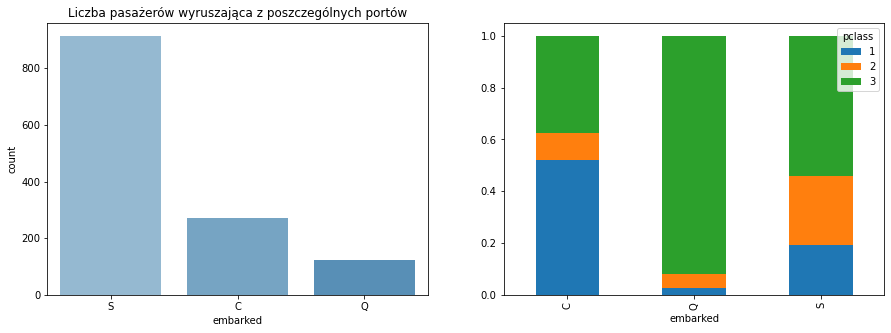

In [28]:

fig = plt.figure(figsize= (15,5))
ax1 = fig.add_subplot(121)
sns.countplot(x='embarked', data=df, palette = sns.color_palette("Blues_d"), ax=ax1 )
ax1.set_title('Liczba pasażerów wyruszająca z poszczególnych portów')
ax2 = fig.add_subplot(122)
x = df.groupby('embarked')['pclass'].value_counts(normalize = True).unstack()
x.plot(kind='bar', ax=ax2, stacked=True)


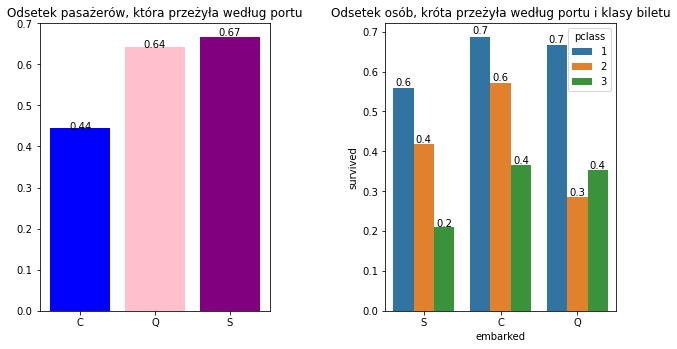

In [215]:
fig, ax = plt.subplots(figsize = (10,5) ,nrows =1, ncols =2)
x = df.groupby(['embarked'])['survived'].value_counts(normalize = True).unstack()
ax[0].bar(x=x.index, height = x.values[0:, 0], color = ['blue', 'pink', 'purple'])
y=x.values[0:, 0]
x= x.index
labels =  x.values
for index in range(len(x)):
    ax[0].text(x[index], round(y[index],2) , round(y[index],2),  size=10, ha = 'center' )
ax[0].set_title('Odsetek pasażerów, która przeżyła według portu')


g = sns.barplot(x="embarked", y ='survived', hue="pclass",
                data = df[(df.embarked.notnull())],
                ax = ax[1], ci=None)
ax[1].set_title('Odsetek osób, króta przeżyła według portu i klasy biletu')
# x = df.groupby(['embarked', 'pclass'])['survived'].value_counts(normalize = True).unstack()[[1]]
# x.reset_index(inplace=True)
# x.set_index(['embarked' , 'pclass'], inplace=True)
# x[[1]].plot(kind = 'bar',stacked = True, ax = ax[1],)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=1)

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
show_values(g)

In [48]:
pd.crosstab( df.survived,df.embarked, normalize=True)

embarked,C,Q,S
survived,,,
0,0.091813,0.060444,0.466718
1,0.114767,0.033665,0.232594


In [34]:
x = df.groupby('embarked')['survived'].value_counts(normalize = True).unstack()

In [35]:
x

survived,0,1
embarked,,
C,0.444444,0.555556
Q,0.642276,0.357724
S,0.667396,0.332604


## Kabina analiza

## Poszukiwanie korelacji pomiedzy umieralnością a pozostałymi zmiennymi.

In [ ]:
sns.heatmap(df.corr(), annot=True )